___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [2]:
df= pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [4]:
df.drop(columns=["CustomerID"],axis=1,inplace = True)

In [5]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

In [7]:
df.Gender.replace("Male",0,inplace=True)
df.Gender.replace("Female",1,inplace=True)

In [8]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual_Income   200 non-null    int64
 3   Spending_Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [10]:
df.shape

(200, 4)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





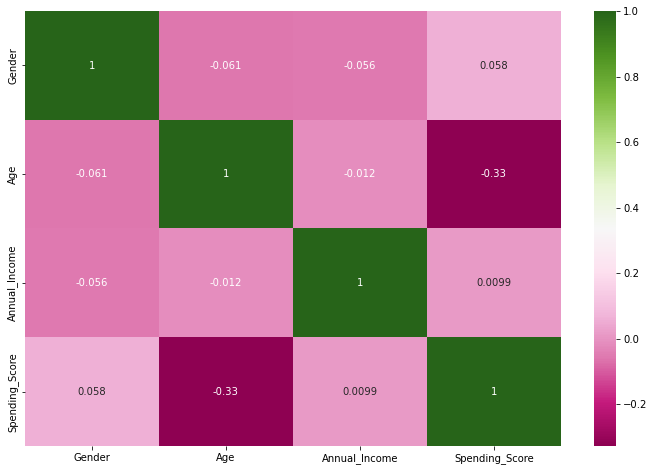

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')
plt.show()

In [14]:
df.groupby("Gender")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0
1,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0


In [15]:
df.groupby("Gender")["Annual_Income"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0
1,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0


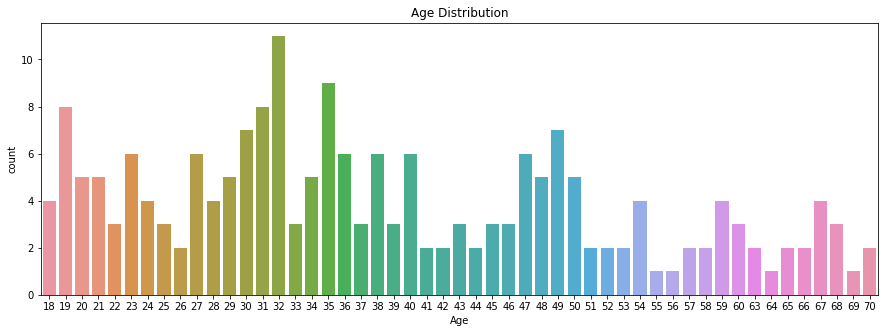

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

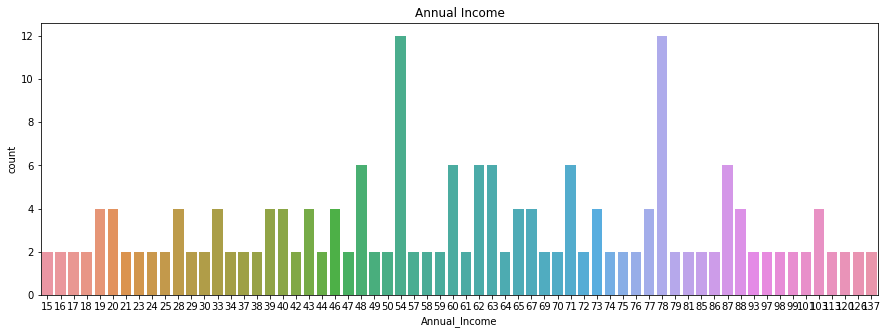

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(df['Annual_Income'])
plt.title('Annual Income');

Text(0, 0.5, 'Count')

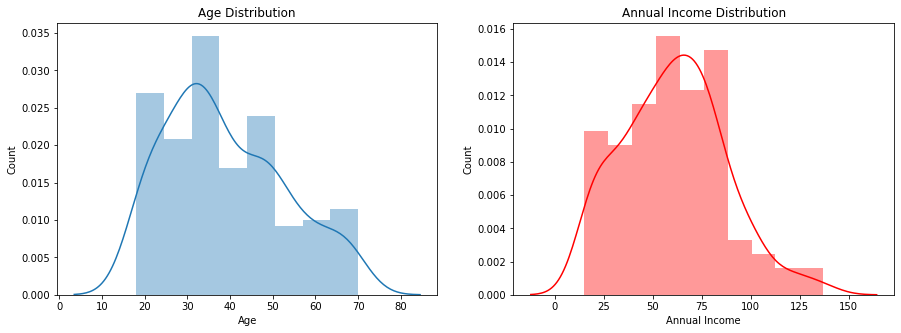

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(df['Annual_Income'],color='red')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

(-1.25, 1.25, -1.25, 1.25)

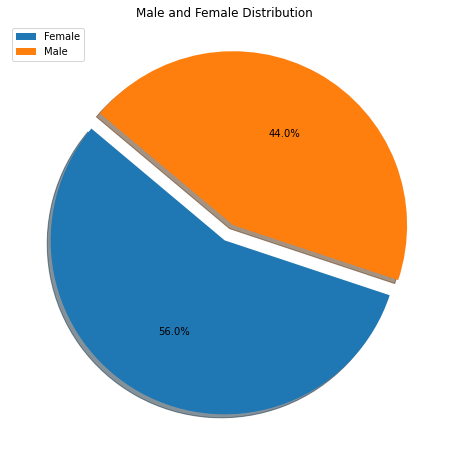

In [19]:
plt.figure(figsize=(8,8))

explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

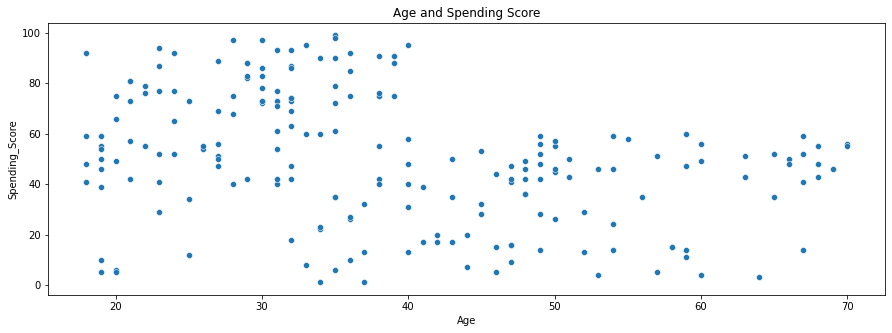

In [20]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['Age'], df['Spending_Score'])
plt.title('Age and Spending Score')
plt.show()

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [21]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler

In [22]:
from pyclustertend import hopkins

In [23]:
df

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [24]:
hopkins(df, df.shape[0]) 

0.3156258222401222

In [25]:
df[["Age",'Spending_Score']]

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [26]:
X = df[["Age",'Spending_Score']]

In [27]:
hopkins(X, X.shape[0])   #0.5 den düşük olan değerler biizm için iyi

0.28878914821567203

In [28]:
from sklearn.cluster import KMeans

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
ssd = [] # sum of squared distance
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

In [31]:
ssd

[189.3874903399243,
 124.32628617921529,
 89.7652167658615,
 71.2955659221944,
 53.15194670471219,
 45.96815991289517,
 39.43300999703658,
 34.18775842128691]

Text(0.5, 1.0, 'elbow method')

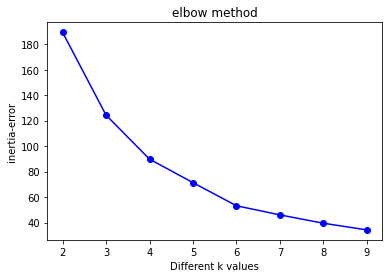

In [32]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [33]:
from yellowbrick.cluster import KElbowVisualizer

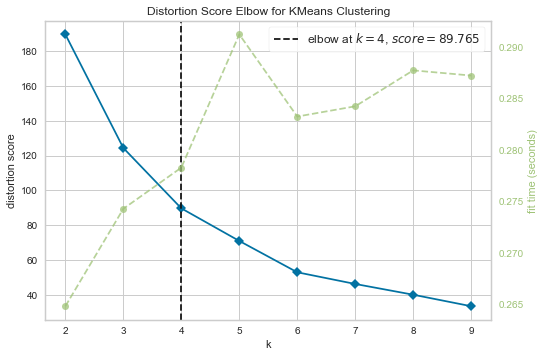

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof()

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
silhouette_score(X, kmeans.labels_)

0.4302602855817146

In [37]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.42369111306686563
For n_clusters=6, the silhouette score is 0.4566283030197353
For n_clusters=7, the silhouette score is 0.4114882432090666
For n_clusters=8, the silhouette score is 0.41807241036672366


#### *ii. Determine optimal number of clusters*

In [38]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [39]:
model.inertia_

89.7652167658615

In [40]:
df["cluster"] = model.labels_

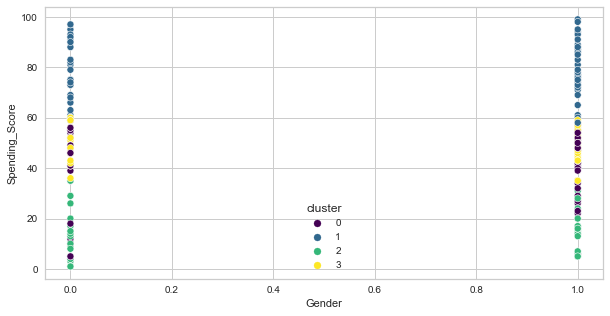

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Gender"], 
                df["Spending_Score"], hue= df.cluster,palette= "viridis");

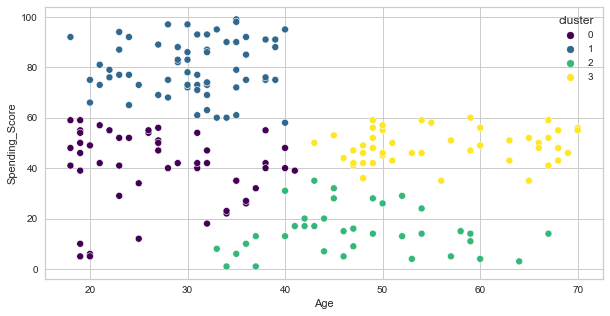

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Age"], 
                df["Spending_Score"], hue= df.cluster,palette= "viridis");

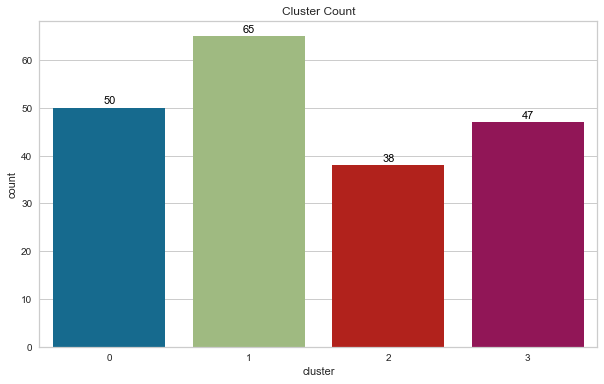

In [43]:
plt.figure(figsize=(10,6))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster)
for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',ha='center',  va='center', 
        fontsize=11, color='black',xytext=(0,7), 
        textcoords='offset points',
        clip_on=True)
plt.show();

### Why silhouette_score is negative?

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [44]:
X = df[["Annual_Income",'Spending_Score']]

In [45]:
hopkins(X, X.shape[0])   #0.5 den düşük olan değerler biizm için iyi

0.3063033299634467

In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
ssd = [] # sum of squared distance
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

In [48]:
ssd

[269.0167937490666,
 157.70400815035947,
 108.92131661364357,
 65.56840815571682,
 55.057348270386,
 44.86475569922556,
 37.74049218906543,
 32.36022982569204]

Text(0.5, 1.0, 'elbow method')

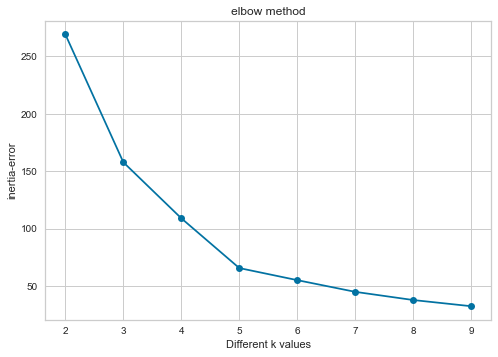

In [49]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [50]:
from yellowbrick.cluster import KElbowVisualizer

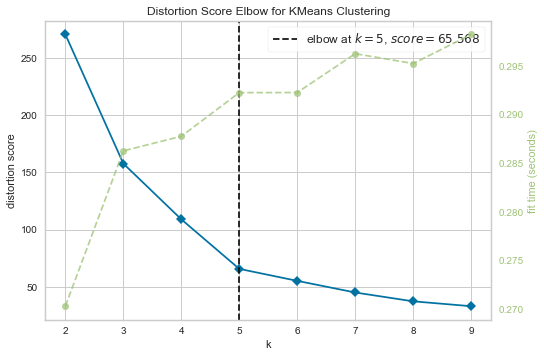

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof()

In [52]:
from sklearn.metrics import silhouette_score

In [53]:
silhouette_score(X, kmeans.labels_)

0.45872827866935667

In [54]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3093014040985521
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5377141165734254
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.45543473014577757


#### *ii. Determine optimal number of clusters*

In [55]:
model = KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [56]:
model.inertia_

65.56840815571682

In [57]:
df["cluster"] = model.labels_

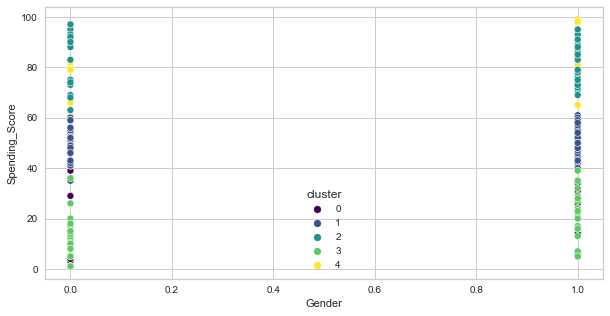

In [58]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Gender"], 
                df["Spending_Score"], hue= df.cluster,palette= "viridis");

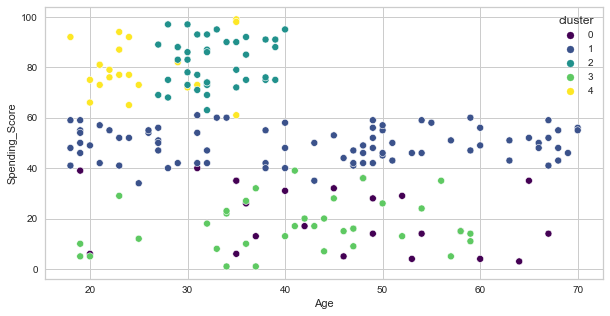

In [59]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Age"], 
                df["Spending_Score"], hue= df.cluster,palette= "viridis");

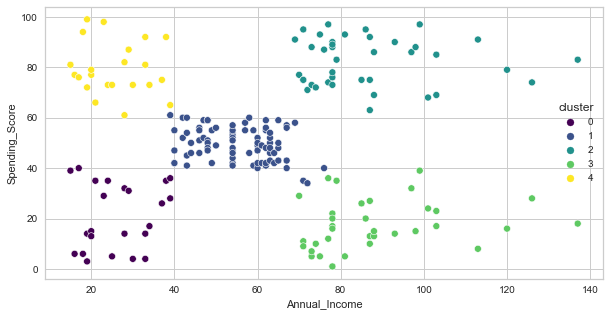

In [60]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Annual_Income"], 
                df["Spending_Score"], hue= df.cluster,palette= "viridis");

#### *iii. Apply K Means*

In [61]:
model = KMeans(n_clusters=4, random_state=42)
model.fit_predict(X)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [62]:
model.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### *iv. Visualizing and Labeling All the Clusters*

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

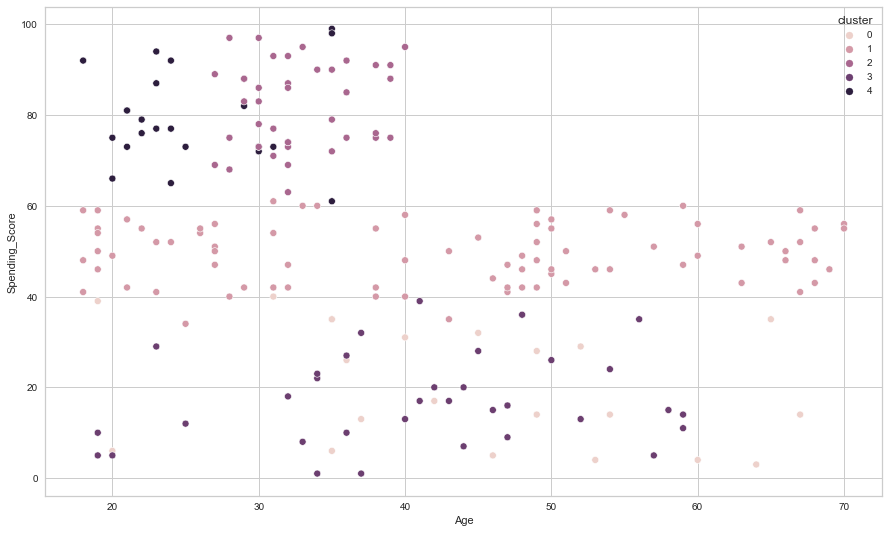

In [63]:
plt.figure(figsize=(15,9))
sns.scatterplot(data=df, x='Age', y='Spending_Score', hue='cluster')


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [65]:
from sklearn.cluster import AgglomerativeClustering

In [66]:
X1 = df[["Age",'Spending_Score']]

In [67]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

### Dendogram

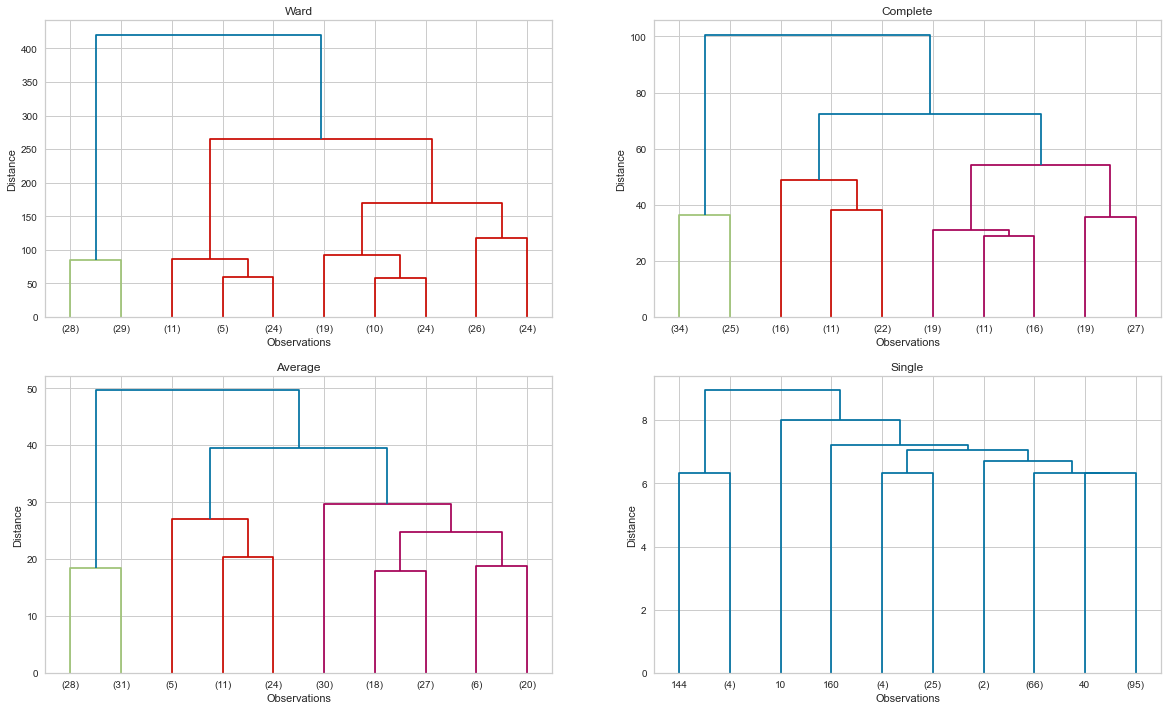

In [68]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### Model Building and label visualisation

In [69]:
model1 = AgglomerativeClustering(n_clusters=3,affinity = "euclidean", linkage = "ward")
model1.fit_predict(X1)

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1], dtype=int64)

In [70]:
df["cluster_1"] = model1.labels_

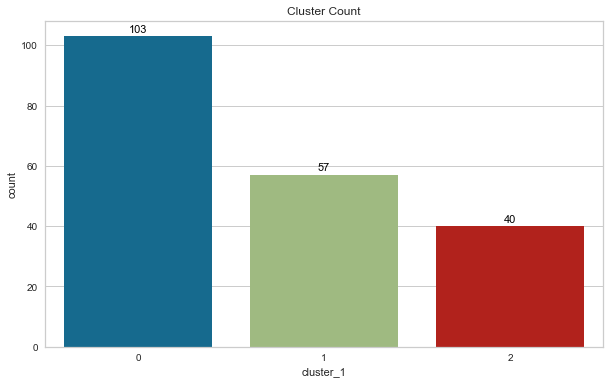

In [71]:
plt.figure(figsize=(10,6))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster_1)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                  
    )
plt.show();

## Clustering based on Annual Income and Spending Score- x2

In [72]:
K = range(2,10)

for k in K:
    model1 = AgglomerativeClustering(n_clusters = k)
    model1.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model1.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [73]:
X1 = df[["Age",'Spending_Score']]

In [74]:
model1 = AgglomerativeClustering(n_clusters=3,affinity = "euclidean", linkage = "ward")
model1.fit_predict(X1)

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1], dtype=int64)

In [75]:
K = range(2,10)

for k in K:
    model1 = AgglomerativeClustering(n_clusters = k)
    model1.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model1.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


#### Annual Income and Spending Score- x2

In [76]:
X2 = df[["Annual_Income",'Spending_Score']]

In [77]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

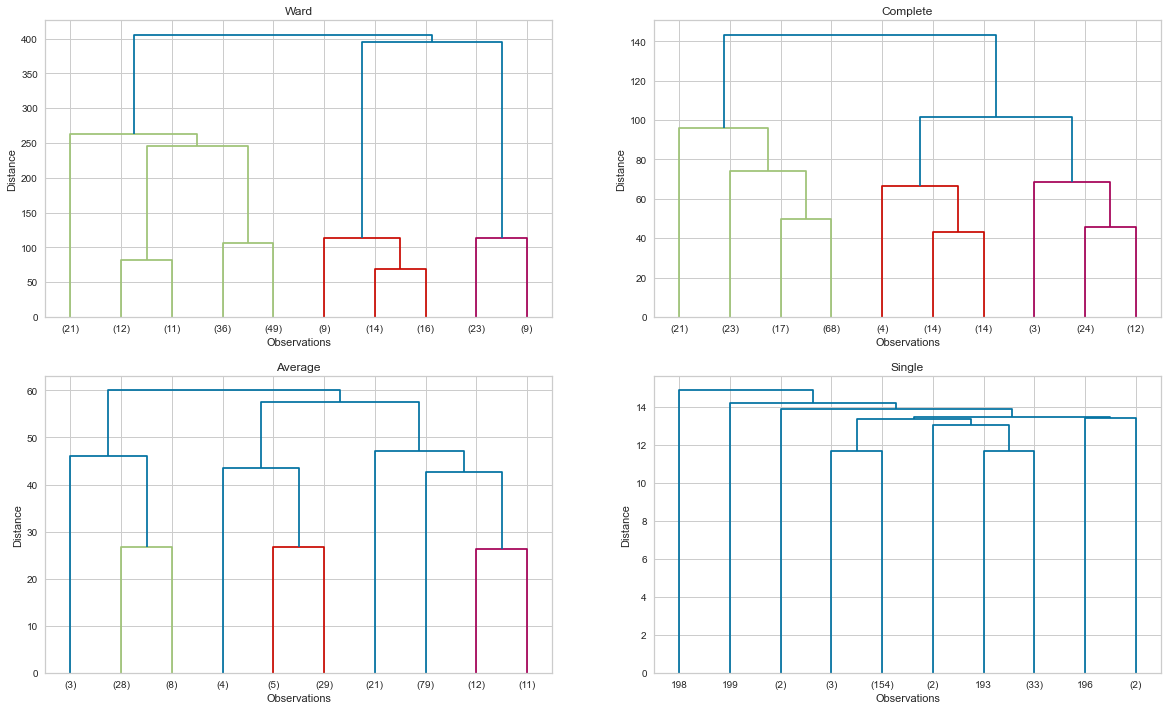

In [78]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [79]:
model2 = AgglomerativeClustering(n_clusters=5,affinity = "euclidean", linkage = "ward")
model2.fit_predict(X2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [80]:
K = range(2,10)

for k in K:
    model2 = AgglomerativeClustering(n_clusters = k)
    model2.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model2.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [81]:
model1.labels_

array([4, 3, 8, 3, 1, 3, 2, 7, 6, 3, 6, 7, 6, 3, 2, 3, 1, 4, 1, 7, 1, 3,
       2, 3, 6, 7, 1, 0, 1, 7, 6, 3, 6, 7, 2, 3, 2, 3, 2, 3, 5, 7, 1, 0,
       1, 4, 0, 4, 1, 1, 0, 0, 4, 0, 0, 0, 0, 5, 4, 0, 5, 4, 5, 0, 5, 4,
       0, 5, 4, 4, 5, 0, 5, 0, 5, 4, 0, 0, 4, 0, 5, 0, 5, 0, 4, 0, 0, 4,
       0, 0, 5, 4, 0, 1, 1, 4, 0, 4, 0, 4, 4, 0, 5, 4, 0, 4, 5, 0, 5, 5,
       5, 4, 1, 4, 4, 4, 5, 0, 0, 0, 4, 1, 0, 7, 1, 3, 1, 7, 6, 3, 2, 3,
       1, 3, 8, 7, 2, 3, 8, 3, 6, 7, 1, 7, 8, 7, 1, 3, 2, 7, 2, 7, 2, 3,
       2, 7, 2, 3, 2, 3, 5, 7, 8, 7, 1, 3, 2, 7, 2, 0, 2, 3, 2, 7, 6, 7,
       6, 3, 6, 7, 1, 7, 2, 7, 1, 7, 1, 3, 2, 7, 2, 3, 2, 7, 2, 3, 1, 3,
       2, 7], dtype=int64)

In [82]:
df["cluster_1"] = model1.labels_

In [83]:
df

,Gender,Age,Annual_Income,Spending_Score,cluster,cluster_1
0,0,19,15,39,0,4
1,0,21,15,81,4,3
2,1,20,16,6,0,8
3,1,23,16,77,4,3
4,1,31,17,40,0,1
...,...,...,...,...,...,...
195,1,35,120,79,2,3
196,1,45,126,28,3,1
197,0,32,126,74,2,3
198,0,32,137,18,3,2


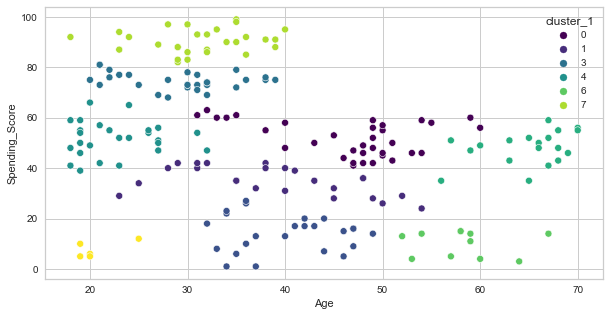

In [84]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Age"], 
                df["Spending_Score"], hue= df.cluster_1,palette= "viridis");

#### Annual Income and Spending Score- x2

In [85]:
df["cluster_2"] = model2.labels_
df

,Gender,Age,Annual_Income,Spending_Score,cluster,cluster_1,cluster_2
0,0,19,15,39,0,4,4
1,0,21,15,81,4,3,3
2,1,20,16,6,0,8,8
3,1,23,16,77,4,3,3
4,1,31,17,40,0,1,4
...,...,...,...,...,...,...,...
195,1,35,120,79,2,3,2
196,1,45,126,28,3,1,6
197,0,32,126,74,2,3,2
198,0,32,137,18,3,2,6


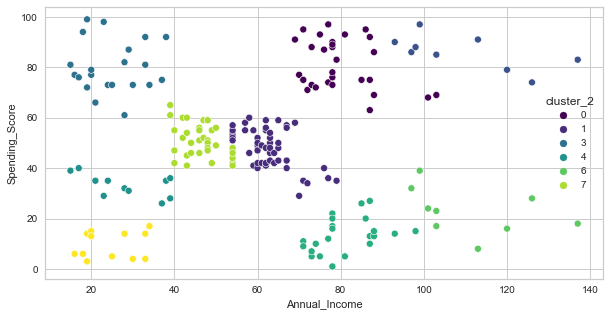

In [86]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Annual_Income"], 
                df["Spending_Score"], hue= df.cluster_2,palette= "viridis");

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___